In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-muted')

# Load Dataset
df = pd.read_csv(r"C:\Users\india\OneDrive\Documents\netflix_titles.csv")

# Head of dataset
print("📌 First 5 Rows:")
print(df.head())

# Basic info
print("\n📌 Info:")
print(df.info())

# Summary stats
print("\n📌 Description of numerical columns:")
print(df.describe())

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for missing values
print("\n📌 Missing Values:")
print(df.isnull().sum())

# Fill missing values (No inplace to avoid FutureWarnings)
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")

# Convert 'date_added' to datetime (flexible format)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Extract numeric duration and its type
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')


📌 First 5 Rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 

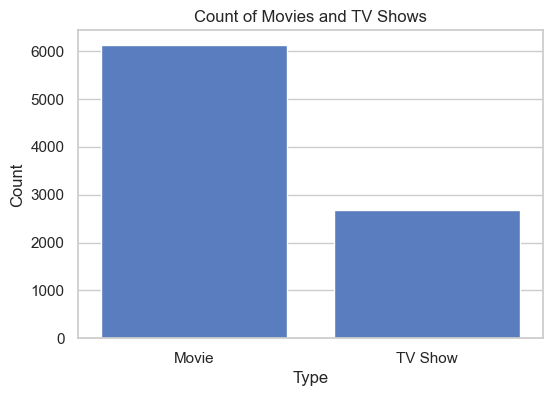

In [6]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


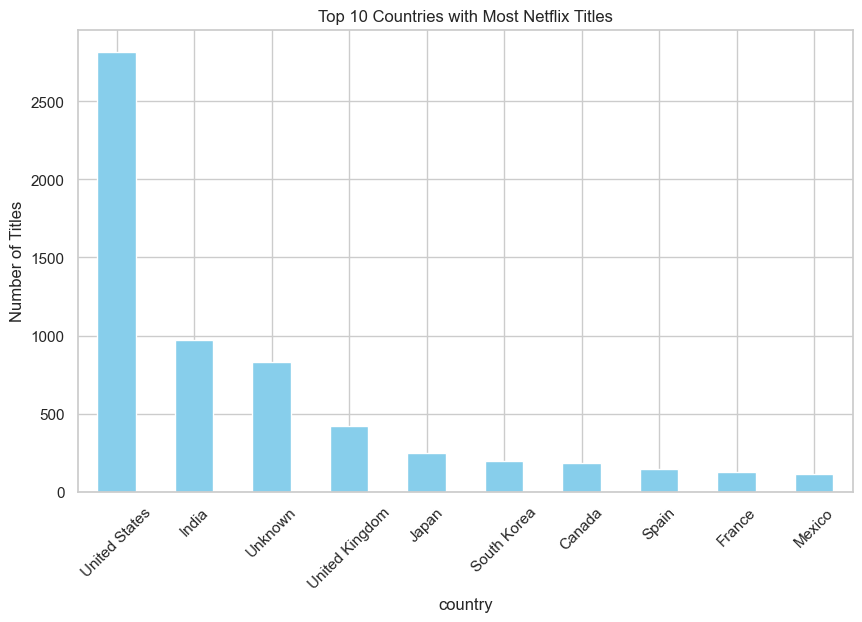

In [7]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


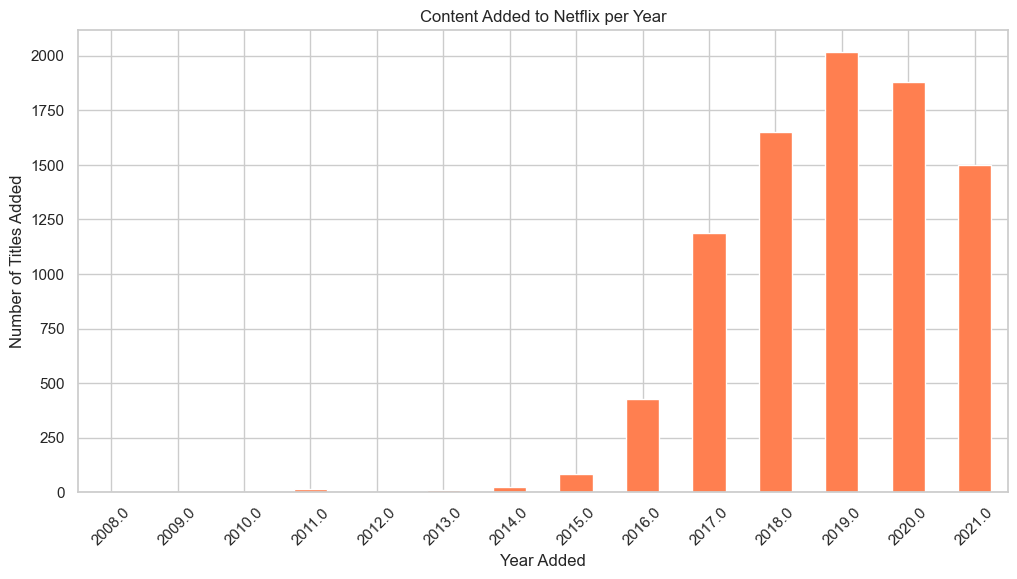

In [8]:
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title("Content Added to Netflix per Year")
plt.ylabel("Number of Titles Added")
plt.xlabel("Year Added")
plt.xticks(rotation=45)
plt.show()


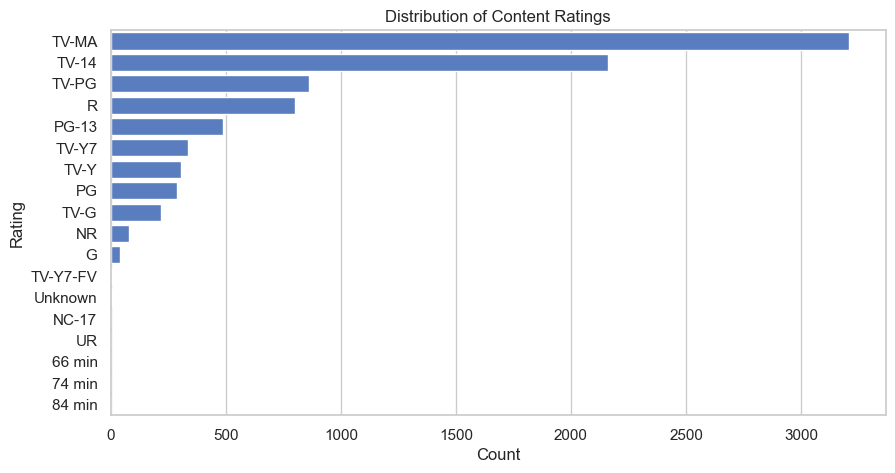

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


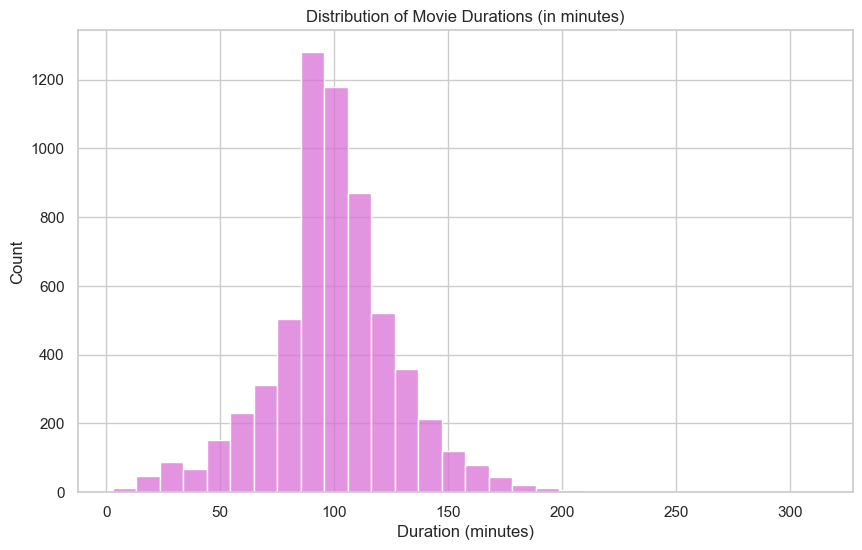

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['type'] == 'Movie']['duration_int'], bins=30, color='orchid')
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


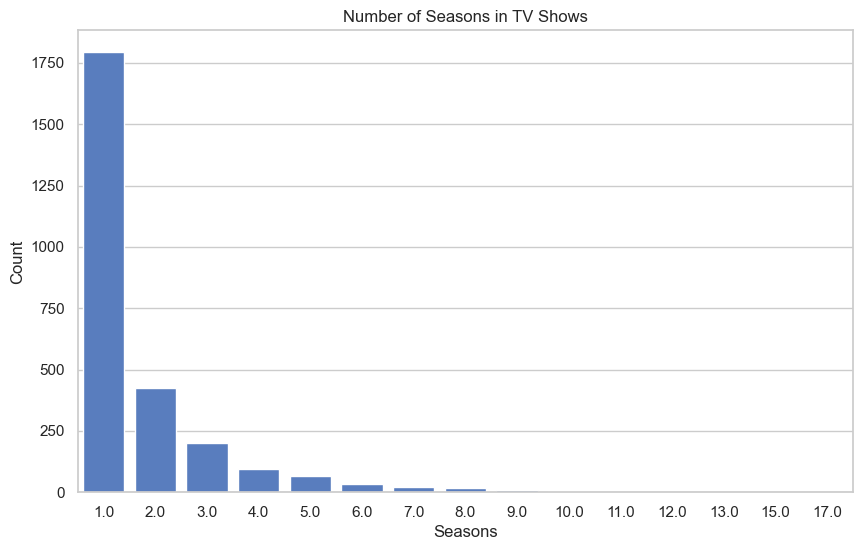

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['type'] == 'TV Show'], x='duration_int')
plt.title("Number of Seasons in TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()
